In [ ]:
BRANCH = 'main'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]

In [ ]:
import nemo
import nemo.collections.asr as nemo_asr
import nemo.collections.nlp as nemo_nlp
import nemo.collections.tts as nemo_tts
import IPython

In [ ]:
Audio_Sample = '2086-149220-0033.wav'
!wget https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav

--2025-05-14 10:49:13--  https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav
Resolving dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)... 52.219.229.226, 52.219.228.26, 52.219.107.10, ...
Connecting to dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)|52.219.229.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237964 (232K) [audio/wav]
Saving to: ‘2086-149220-0033.wav’

2086-149220-0033.wa 100%[===================>] 232.39K  1.02MB/s    in 0.2s    

2025-05-14 10:49:14 (1.02 MB/s) - ‘2086-149220-0033.wav’ saved [237964/237964]



In [ ]:
IPython.display.Audio(Audio_Sample)

In [ ]:
import librosa
# Load audio file (returns: waveform, sample_rate)
A_S, sr = librosa.load('2086-149220-0033.wav', sr=None)

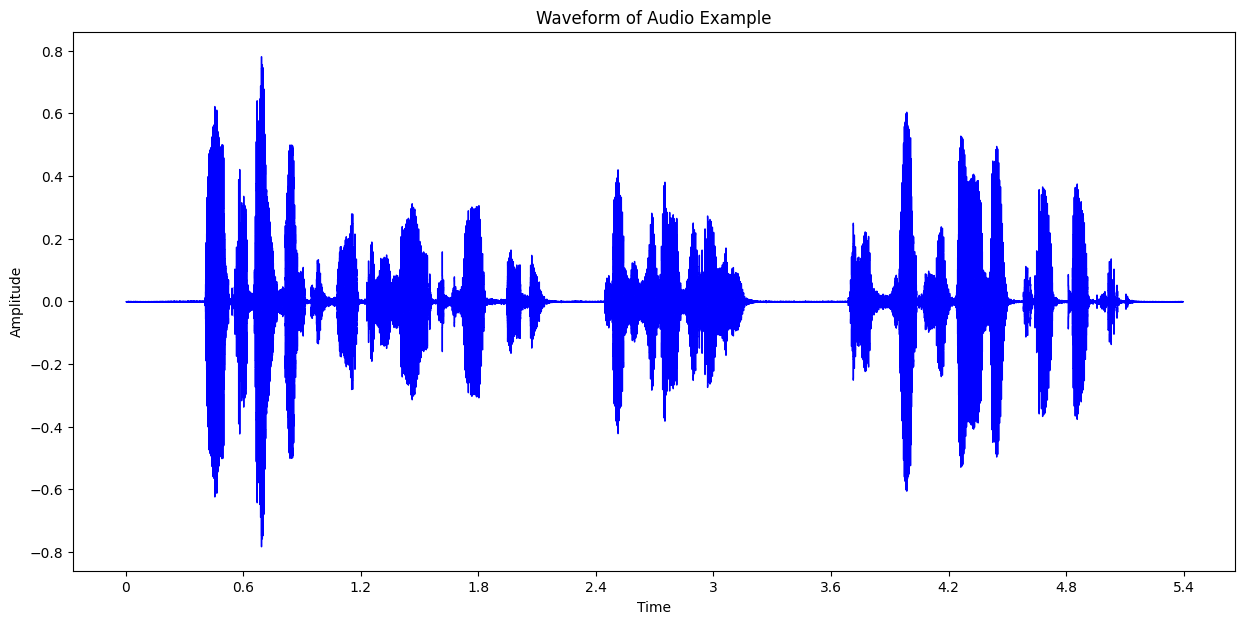

In [ ]:
%matplotlib inline
import librosa.display
import matplotlib.pyplot as plt

# Plot our example audio file's waveform
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Waveform of Audio Example')
plt.ylabel('Amplitude')

_ = librosa.display.waveshow(A_S, color='blue')

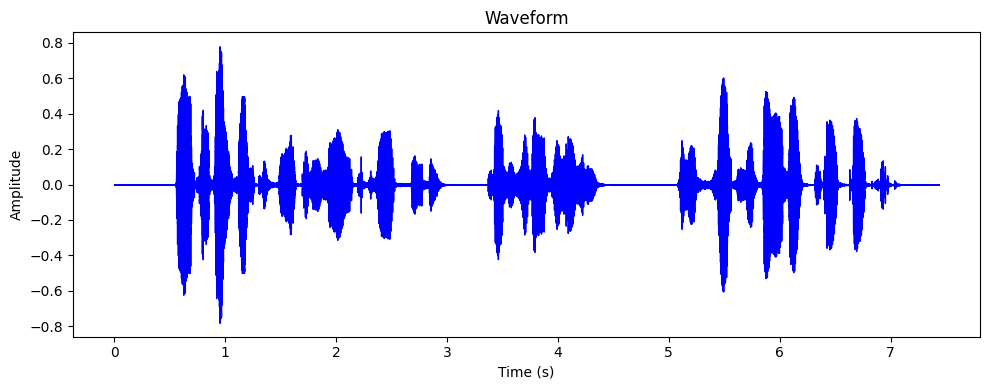

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(A_S, sr=sr, color='Blue')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


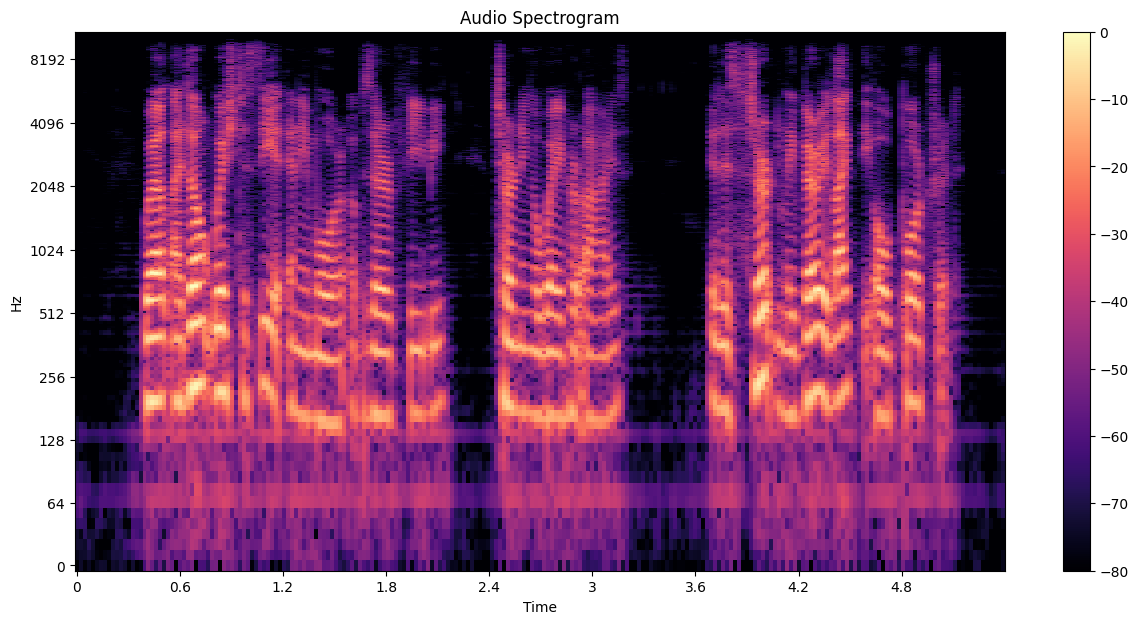

In [ ]:
import numpy as np

# Get spectrogram using Librosa's Short-Time Fourier Transform (stft)
spec = np.abs(librosa.stft(A_S))
spec_db = librosa.amplitude_to_db(spec, ref=np.max)  # Decibels

# Use log scale to view frequencies
librosa.display.specshow(spec_db, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Audio Spectrogram');

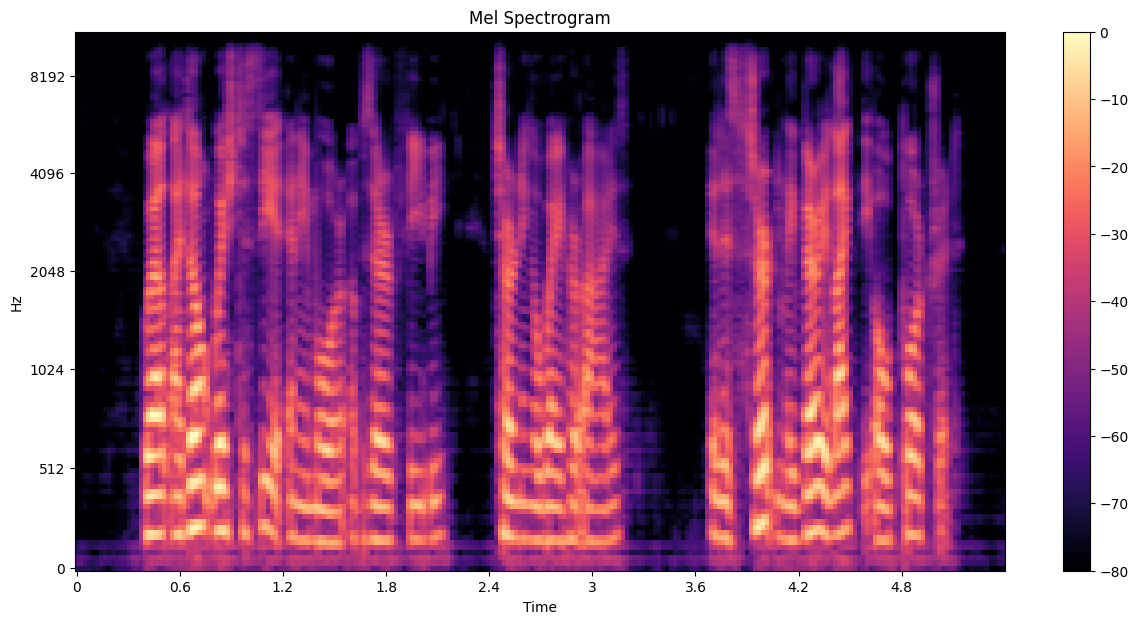

In [ ]:
# Plot the mel spectrogram of our sample
mel_spec = librosa.feature.melspectrogram(y=A_S)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

librosa.display.specshow(
    mel_spec_db, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('Mel Spectrogram');

In [ ]:
# This line will download pre-trained QuartzNet15x5 model from NVIDIA's NGC cloud and instantiate it for you
#quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="QuartzNet15x5Base-En").cuda()
quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_en_quartznet15x5").cuda()

In [ ]:
spectrogram_generator = nemo_tts.models.FastPitchModel.from_pretrained(model_name = "tts_en_fastpitch").cuda()

In [ ]:
# List available HiFi-GAN pretrained models
nemo_tts.models.HifiGanModel.list_available_models()

In [ ]:
vocoder = nemo_tts.models.HifiGanModel.from_pretrained(model_name="tts_en_hifigan").cuda()

In [ ]:
files = [Audio_Sample]
raw_text = ''
text = ''
for fname, transcription in zip(files, quartznet.transcribe(files)):
  raw_text = transcription
text = raw_text
print(raw_text)

Transcribing: 100%|██████████| 1/1 [00:00<00:00, 28.43it/s]

Hypothesis(score=tensor(-7.0298), y_sequence=tensor([28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 23, 28,  5, 12, 28, 12, 12, 28, 28,  0,  0,  0,  0,  9,  0,  0,  0,
         0,  4, 15, 28, 14, 27, 20, 20, 28,  0,  0, 28, 23,  9, 28, 19, 28,  8,
        28, 28,  0,  0,  0, 20, 15,  0,  0,  0,  0, 19,  5, 28,  5, 28,  0,  0,
         9, 20,  0,  0,  0,  0,  0, 28,  1, 14, 28, 28, 25, 28, 28,  0,  0, 13,
        28, 15, 28, 18,  5, 28,  0,  0,  0,  0,  0,  0,  0,  0, 28, 15,  2, 28,
        28, 28, 28, 19, 28,  5, 28, 18, 22,  5,  5,  4, 28,  0,  0, 28, 28, 28,
        16,  8, 15,  5, 28, 28, 28,  2, 28,  5, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,  0,  0, 28, 28, 20,
        28, 21, 28, 18, 28, 14, 14, 28,  9, 14,  7, 28,  0,  0, 28,  1, 28, 28,
        23, 28,  1, 25, 28,  0,  0,  0,  0,  0,  0,  8,  5, 18, 18,  0,  0,

In [ ]:
IPython.display.Audio(Audio_Sample)

In [ ]:
def text_to_audio(text):
    # Step 1: Convert text to tokens
    tokens = spectrogram_generator.parse(text)

    # Step 2: Generate spectrogram from tokens
    spectrogram = spectrogram_generator.generate_spectrogram(tokens=tokens)

    # Step 3: Convert spectrogram to audio
    audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)
    return audio.to('cpu').detach().numpy()


In [ ]:
IPython.display.Audio(text_to_audio(raw_text), rate=22050)


[NeMo W 2025-05-14 11:10:59 nemo_logging:405] parse() is meant to be called in eval mode.
[NeMo W 2025-05-14 11:10:59 nemo_logging:405] generate_spectrogram() is meant to be called in eval mode.
